##                       IMPORTING LIBRARIES AND LOADING DATA 

In [302]:

import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [304]:
#loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data , columns = breast_cancer_dataset.feature_names)

In [305]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [306]:
# adding the target column to data frame
data_frame["label"]= breast_cancer_dataset.target

In [307]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [308]:
data_frame.shape

(569, 31)

#                DATA   MANIPULATION

In [309]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [310]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [311]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [312]:
# checking the distribution of the target variable
data_frame["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [313]:
data_frame.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


 Separeting the features and target

#         DATA VISUALIZATION

(0.0, 2000.0)

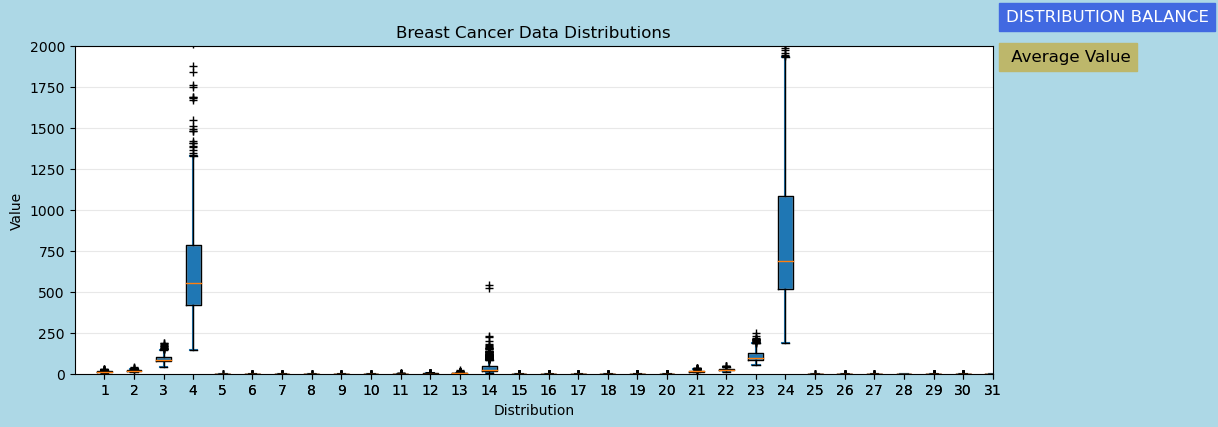

In [314]:
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(10, 4),
                        facecolor='lightblue')
plt.boxplot(data_frame, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 1},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5},)
axs.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
axs.set(
    axisbelow=True,
    title='Breast Cancer Data Distributions',
    xlabel='Distribution',
    ylabel='Value')


bp = axs.boxplot(data_frame, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')



fig.text(1, 1, 'DISTRIBUTION BALANCE',
         backgroundcolor=box_colors[1],color='white', weight='roman', size='large')
fig.text(1, 0.9, ' Average Value', color='black', weight='roman', backgroundcolor=box_colors[0],
         size='large')

plt.xlim(0,31)
plt.ylim(0,2000)


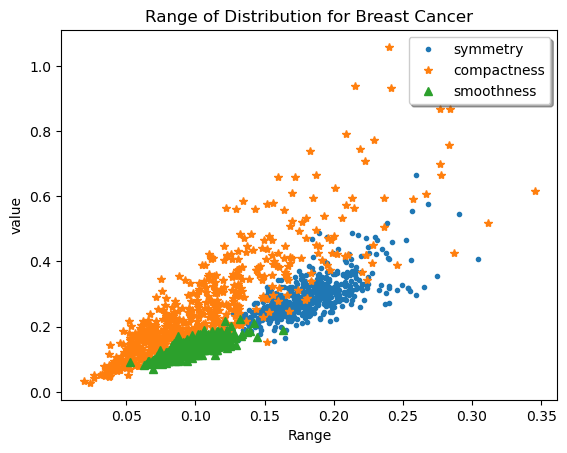

In [315]:
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

l1, = plt.plot(data_frame["mean symmetry"],data_frame["worst symmetry"],".")
l2, = plt.plot(data_frame["mean compactness"],data_frame["worst compactness"],"*")
l3, = plt.plot(data_frame["mean smoothness"],data_frame["worst smoothness"],"^")
plt.legend((l1, l2,l3), ('symmetry', 'compactness','smoothness'), loc='best', shadow=True)
plt.xlabel('Range')
plt.ylabel('value')
plt.title('Range of Distribution for Breast Cancer')
plt.show()

In [316]:
for col in data_frame:
    print(col)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
label


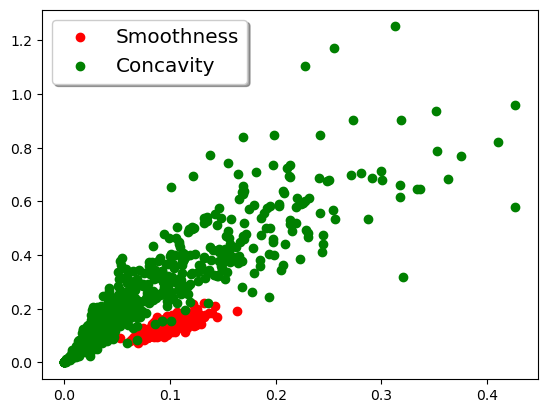

In [317]:
fig = plt.figure()
ax = fig.add_subplot()
b = ax.scatter(x=data_frame["mean smoothness"], y = data_frame["worst smoothness"],c="red",label = "Smoothness")
c = ax.scatter(x=data_frame["mean concavity"], y = data_frame["worst concavity"],c="green",label= "Concavity")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')

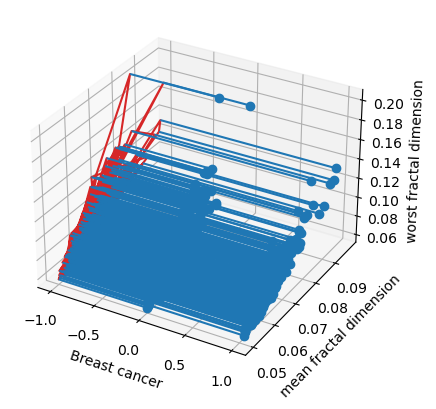

In [318]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem( data_frame["label"],data_frame["mean fractal dimension"],data_frame["worst fractal dimension"] , bottom=-1, orientation='x')
ax.set(xlabel='Breast cancer', ylabel='mean fractal dimension', zlabel='worst fractal dimension')

plt.show()

<StemContainer object of 3 artists>

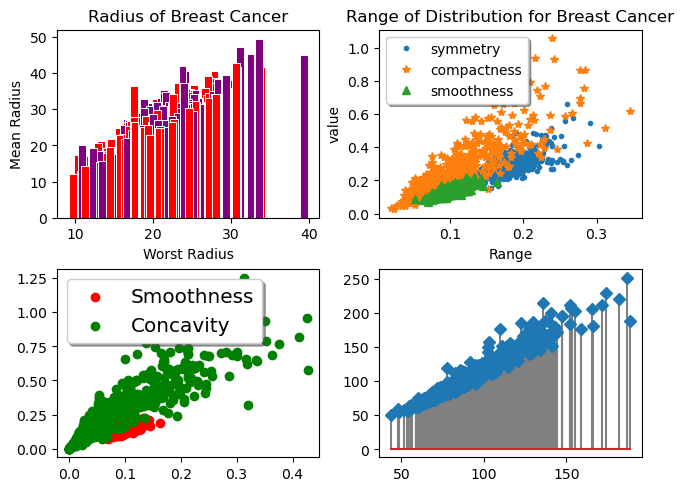

In [319]:
fig = plt.figure(layout="constrained")
ax_array = fig.subplots(2, 2, squeeze=False)
ax_array[0, 0].bar(x=data_frame["mean texture"],height=data_frame["worst texture"],width=1, edgecolor="white", linewidth=0.7,color=barcolor)
ax_array[0, 0].set_xlabel("Worst Radius")
ax_array[0, 0].set_ylabel("Mean Radius")
ax_array[0, 0].set_title("Radius of Breast Cancer")
ax_array[0, 1].plot(data_frame["mean symmetry"],data_frame["worst symmetry"],".")
ax_array[0, 1].plot(data_frame["mean compactness"],data_frame["worst compactness"],"*")
ax_array[0, 1].plot(data_frame["mean smoothness"],data_frame["worst smoothness"],"^")
ax_array[0, 1].legend( ('symmetry', 'compactness','smoothness'), loc='best', shadow=True)
ax_array[0, 1].set_xlabel('Range')
ax_array[0, 1].set_ylabel('value')
ax_array[0, 1].set_title("Range of Distribution for Breast Cancer")
ax_array[1, 0].scatter(x=data_frame["mean smoothness"], y = data_frame["worst smoothness"],c="red",label = "Smoothness")
ax_array[1, 0].scatter(x=data_frame["mean concavity"], y = data_frame["worst concavity"],c="green",label= "Concavity")
ax_array[1, 0].legend(loc='upper left', shadow=True, fontsize='x-large')
ax_array[1, 1].stem( data_frame["mean perimeter"], data_frame["worst perimeter"],linefmt='grey', markerfmt='D', bottom=1.1)


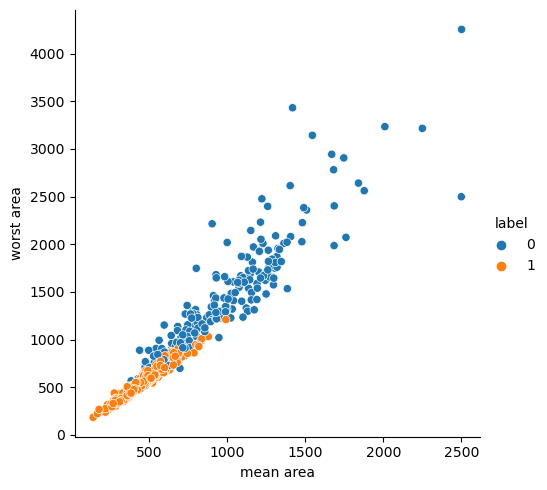

In [320]:
sns.relplot(
    data=data_frame,
    x="mean area", y="worst area",hue="label"
)

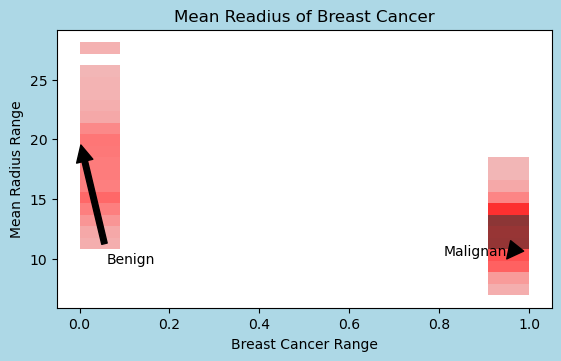

In [321]:
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(5.5, 3.5),
                        facecolor='lightblue')
sns.histplot(data = data_frame, x= data_frame["label"],y = data_frame["mean radius"] ,color="red",)
plt.annotate('Benign', xy=(0,20), xytext=(0.1,0.2),textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Malignan', xy=(0.95,10), xytext=(0.8,1),textcoords='offset pixels',
            va='bottom', ha='right',arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Mean Readius of Breast Cancer")
plt.xlabel("Breast Cancer Range")
plt.ylabel("Mean Radius Range")

plt.show()

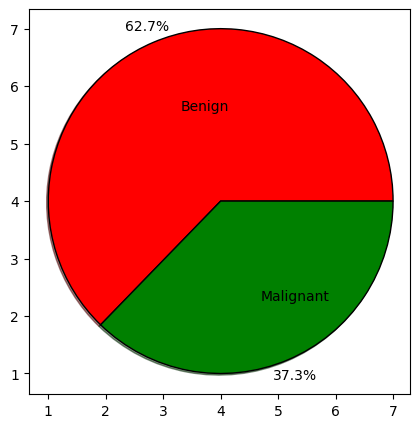

In [322]:
labels = 'Benign','Malignant'
plt.figure (figsize= (7,5))
plt.pie(x=data_frame["label"].value_counts(), radius=3, center=(4, 4),colors=["red","green"], wedgeprops={"linewidth": 1, "edgecolor": "black"}, frame=True,labels=labels,autopct='%1.1f%%',pctdistance=1.1, labeldistance=.6, shadow=True)
plt.show()

# DATA PREDICTION PROCESS

In [335]:
x = data_frame.drop(columns="label",axis=1)
y =  data_frame["label"]

In [336]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [328]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [330]:
x_train.shape

(455, 30)

In [331]:
y_train.shape

(455,)

Model Traing

In [332]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [333]:
xprediction = model.predict(x_train)
accuracy_prediction = accuracy_score(y_train,xprediction)
print("accuracy is ",accuracy_prediction)

accuracy is  0.945054945054945


In [334]:
x_test_prediction = model.predict(x_test)
x_test_accuracy = accuracy_score(y_test,x_test_prediction)
print("accuracy is ",x_test_accuracy)

accuracy is  0.9122807017543859


# ----------------------------------------------THE END---------------------------------------------------